<a href="https://colab.research.google.com/github/vitorinojuliano/Mortalidade2020/blob/main/T1_Mortalidade_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este dataset corresponde ao Sistema de Informações sobre Mortalidade (SIM) do Ministério da Saúde, com dados de óbitos ocorridos em todo o território brasileiro até junho de 2025. As informações são disponibilizadas em arquivos DBF e cada registro contém um conjunto amplo de variáveis que podem ser agrupadas em cinco grandes categorias:

*  Identificação e ocorrência do óbito
Inclui o tipo de óbito (fetal ou não fetal),  data e hora do evento, município e local de ocorrência (hospital, domicílio, via pública etc.), além do código do estabelecimento de saúde (CNES) e código do município de ocorrência.

* Características demográficas e socioeconômicas
Abrange naturalidade (município/UF de nascimento), data de nascimento, idade (unidades variáveis — minutos, horas, dias, meses ou anos), sexo, cor/raça, estado civil, escolaridade (nível e série) e ocupação habitual. Também registra o município de residência do falecido.

* Causas da morte (CID-10)
Detalha as causas declaradas na Parte I (linhas A, B, C e D) e Parte II da Declaração de Óbito, permitindo identificar a causa direta, as causas antecedentes e a causa básica da morte.


* Óbitos maternos e fetais
Para óbitos relacionados à gestação, contém idade e escolaridade da mãe, número de filhos vivos e mortes fetais anteriores, semanas de gestação, tipo de gravidez (única, gemelar, etc.), tipo de parto, momento do óbito em relação ao parto e peso ao nascer (nos óbitos fetais).


* Investigação e qualidade do dado
Registra se houve assistência médica contínua, realização de necropsia, investigação epidemiológica (com datas de investigação e conclusão), fontes de informação utilizadas, além de indicadores de qualidade como status de codificação, versão do sistema, lote de processamento e flags de revisão ou alteração das causas de morte.

Com essa estrutura, o SIM possibilita análises epidemiológicas detalhadas da mortalidade no Brasil, permitindo mapear padrões geográficos, perfis sociodemográficos e avaliar a qualidade dos registros de óbito.

---


Montando o ambiente para acessar os dados

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/Pandas/T1/Mortalidade_Geral_2020.csv'

dados = pd.read_csv(file_path, delimiter=';')

dados.head()


/tmp/ipython-input-47-2183400688.py:5: DtypeWarning: Columns (66,79) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(file_path, delimiter=';')


,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,RACACOR,...,FONTES,TPRESGINFO,TPNIVELINV,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,CONTADOR
0,1,2,18052020,1452.0,812.0,120010.0,7061932.0,487,1,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,603
1,1,2,20052020,2115.0,812.0,120010.0,16031952.0,468,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,604
2,1,2,21052020,1200.0,812.0,120010.0,17021961.0,459,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,605
3,1,2,21052020,1233.0,812.0,120010.0,10081942.0,477,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,606
4,1,2,22052020,730.0,812.0,120030.0,13041936.0,484,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,607


Descrevendo os códigos CID para identificar melhor os dados

In [ ]:
mapa_local = {
    1 : 'Hospital',
    2 : 'Outros estab de saúde',
    3 : 'Domicílio',
    4 : 'Via pública',
    5 : 'Outros',
    6 : 'Aldeia indígena'
}

mapa_estadoCivil = {
    1.0: 'Solteiro',
    2.0: 'Casado',
    3.0: 'Viúvo',
    4.0: 'Separado judicialmente/Divorciado',
    5.0: 'União estável',
    9.0: 'Ignorado'
}

map_sexo = {
    1: 'M',
    2: 'F'
}

mapa_tipMorte = {
    'B342': 'Infecção por coronavírus',
    'I219': 'Infarto agudo do miocárdio, não especificado',
    'R99':  'Causas mal definidas de morte',
    'J189': 'Pneumonia não especificada',
    'E149': 'Diabetes mellitus não especificado',
    'C349': 'Neoplasia maligna de pulmão/brônquio',
    'G309': 'Doença de Alzheimer não especificada',
    'N390': 'Infecção urinária não especificada',
    'I10':  'Hipertensão essencial (primária)'
}

mapa_MorteViolenta = {
    1.0 : 'Acidente',
    2.0 : 'Suicídio',
    3.0 : 'Homicídio',
    4.0 : 'Outros'
}

Verificando a estrutura geral do conjunto de dados e descrevendo a base de dados

In [ ]:
dados.info()
num_colunas = dados.shape[1]
num_linhas = dados.shape[0]
print(f"O conjunto de dados possui {num_linhas} linhas e {num_colunas} colunas.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556824 entries, 0 to 1556823
Data columns (total 87 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   ORIGEM      1556824 non-null  int64  
 1   TIPOBITO    1556824 non-null  int64  
 2   DTOBITO     1556824 non-null  int64  
 3   HORAOBITO   1497806 non-null  float64
 4   NATURAL     1469096 non-null  float64
 5   CODMUNNATU  1446983 non-null  float64
 6   DTNASC      1553080 non-null  float64
 7   IDADE       1556824 non-null  int64  
 8   SEXO        1556824 non-null  int64  
 9   RACACOR     1516188 non-null  float64
 10  ESTCIV      1475822 non-null  float64
 11  ESC         1442466 non-null  float64
 12  ESC2010     1437863 non-null  float64
 13  SERIESCFAL  361095 non-null   float64
 14  OCUP        1306818 non-null  float64
 15  CODMUNRES   1556824 non-null  int64  
 16  LOCOCOR     1556824 non-null  int64  
 17  CODESTAB    1131930 non-null  float64
 18  ESTABDESCR  0 non-null

Verificando a quantidade de valores nulos em cada coluna

In [ ]:
dados.isnull().sum()

,0
ORIGEM,0
TIPOBITO,0
DTOBITO,0
HORAOBITO,59018
NATURAL,87728
...,...
MORTEPARTO,1530401
DTCONCASO,1532555
FONTESINF,1556824
ALTCAUSA,1531375


Verificando a distribuição das variaveis

In [ ]:
dados_filtrado = dados[dados['SEXO'].isin([1, 2])].copy()
dados_filtrado['SEXO'] = dados_filtrado['SEXO'].map(map_sexo)

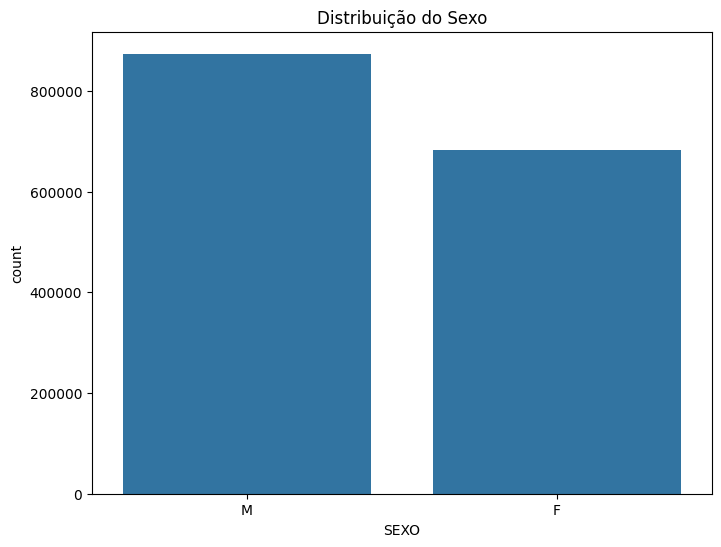

In [ ]:
# Gráfico de barras para distribuição do Sexo
plt.figure(figsize=(8, 6))
sns.countplot(x=dados_filtrado['SEXO'])
plt.title('Distribuição do Sexo')
plt.show()

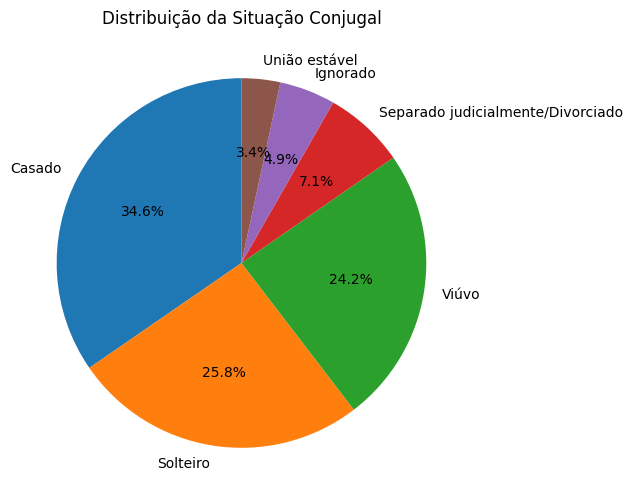

In [ ]:
# Gráfico de pizza para a Situação Conjugal
situation_conjugal = dados['ESTCIV'].map(mapa_estadoCivil)
frequencias = situation_conjugal.value_counts()
labels = frequencias.index

plt.figure(figsize=(8, 6))
plt.pie(frequencias, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição da Situação Conjugal')
plt.show()

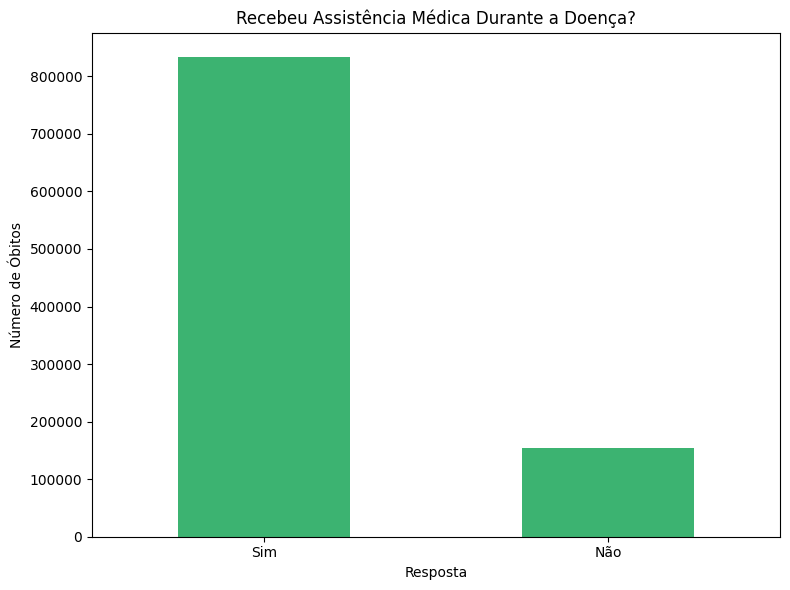

In [ ]:
# Mapeia os códigos para rótulos legíveis
mapa_assistmed = {
    1: 'Sim',
    2: 'Não',
}

# Garante tipo correto e aplica o mapeamento
dados['ASSISTMED'] = dados['ASSISTMED'].astype(float).astype('Int64')
dados['ASSISTMED_LABEL'] = dados['ASSISTMED'].map(mapa_assistmed)

contagem_assistmed = dados['ASSISTMED_LABEL'].value_counts()

contagem_assistmed.plot(kind='bar', color='mediumseagreen', figsize=(8, 6))
plt.title('Recebeu Assistência Médica Durante a Doença?')
plt.xlabel('Resposta')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Gerando o bloxplot para verificar a média e os outliers de algumas caracteristicas

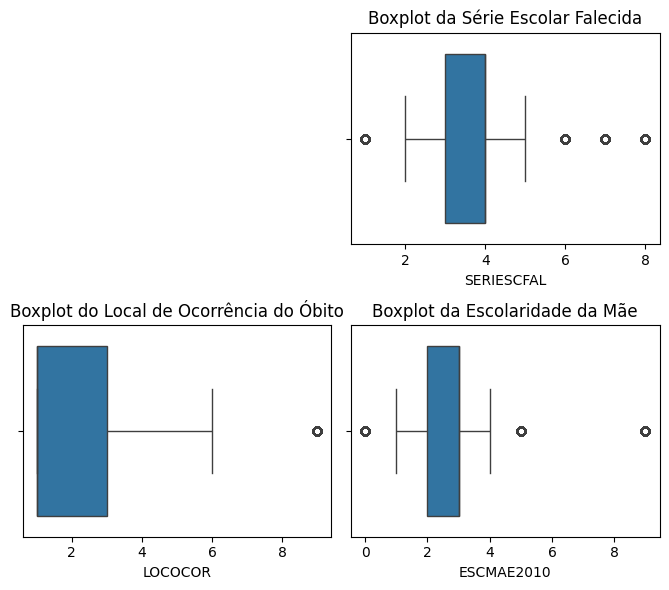

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


plt.subplot(2, 3, 2)
sns.boxplot(x=dados['SERIESCFAL'])
plt.title('Boxplot da Série Escolar Falecida')

plt.subplot(2, 3, 4)
sns.boxplot(x=dados['LOCOCOR'])
plt.title('Boxplot do Local de Ocorrência do Óbito')

plt.subplot(2, 3, 5)
sns.boxplot(x=dados['ESCMAE2010'])
plt.title('Boxplot da Escolaridade da Mãe')


plt.tight_layout()
plt.show()


Convertendo a idade para a idade em anos padrão pois ele considera o minuto/hora.

In [ ]:
dados['IDADE'].unique()

array([487, 468, 459, 477, 484, 454, 485, 450, 469, 445, 430, 458, 449,
       473, 464, 447, 467, 481, 470, 443, 486, 103, 462, 216, 479, 411,
       490, 301, 476, 482, 480, 488, 438, 471, 455, 491, 431, 457, 101,
       483, 460, 446, 478, 437, 444, 475, 205, 465, 466, 434, 439, 498,
       417, 401, 497, 472, 496, 407, 422, 441, 489, 423, 493, 425, 463,
       499, 456, 420, 433, 416, 428, 432, 451, 406, 494, 436, 424, 500,
       210, 435, 302, 453, 427, 461, 492, 495, 448, 474, 440, 311, 203,
       426, 305, 999,  49, 413, 402, 421, 404, 405, 501, 419, 502, 201,
       408, 225, 418, 304, 202, 442, 429, 452, 415, 410, 506, 412, 218,
       510, 228, 307, 503,  20, 308, 310, 306,   3, 222, 219, 212, 227,
       507, 309, 111, 206, 303, 106, 504, 113, 217, 123, 204,  50, 102,
       220, 207, 414, 213, 221, 409, 209,  10,  30,  59,  43, 403, 104,
       105,  45, 208, 224, 223, 214,  38, 110, 508,  15, 108, 107,  47,
       215,  56,  23, 121, 505, 114, 226,  35, 122, 509, 211,  2

In [ ]:
dados['IDADE'].isnull().sum()

np.int64(0)

In [ ]:
def converter_idade(idade):
    idade = str(idade)

    if len(idade) < 3 or not idade.isdigit():
        return None

    unidade = int(idade[0])
    valor = int(idade[1:])

    # Conversão conforme a unidade
    if unidade == 1:  # Minutos
        return valor / (60 * 24 * 365)  # Minutos para anos
    elif unidade == 2:  # Horas
        return valor / (24 * 365)  # Horas para anos
    elif unidade == 3:  # Meses
        return valor / 12  # Meses para anos
    elif unidade == 4:  # Anos
        return valor  # Já está em anos
    elif unidade == 5:  # Idade maior que 100 anos
        return valor  # Já está em anos (presumindo que é um valor maior que 100)

    return None  # Caso a unidade seja ignorada (9)

dados['IDADE_anos'] = dados['IDADE'].apply(converter_idade)

dados[['IDADE', 'IDADE_anos']].head()


,IDADE,IDADE_anos
0,487,87.0
1,468,68.0
2,459,59.0
3,477,77.0
4,484,84.0


In [ ]:
dados['IDADE_anos'].describe()

,IDADE_anos
count,1.551862e+06
mean,6.545884e+01
std,2.150635e+01
min,0.000000e+00
25%,5.500000e+01
50%,7.000000e+01
75%,8.100000e+01
max,9.900000e+01


Verificando o boxsplot da Idade normalizada para visualizar a média e os outliers

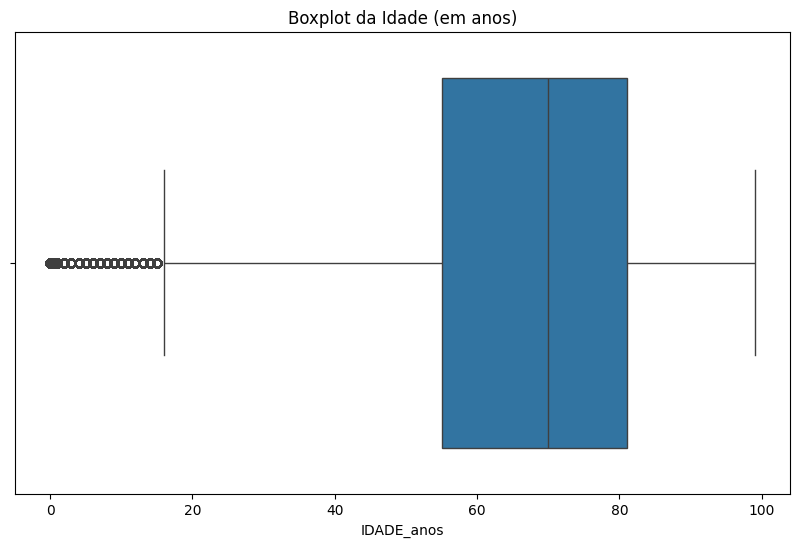

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['IDADE_anos'])
plt.title('Boxplot da Idade (em anos)')
plt.show()

Verificando correlações entre variáveis

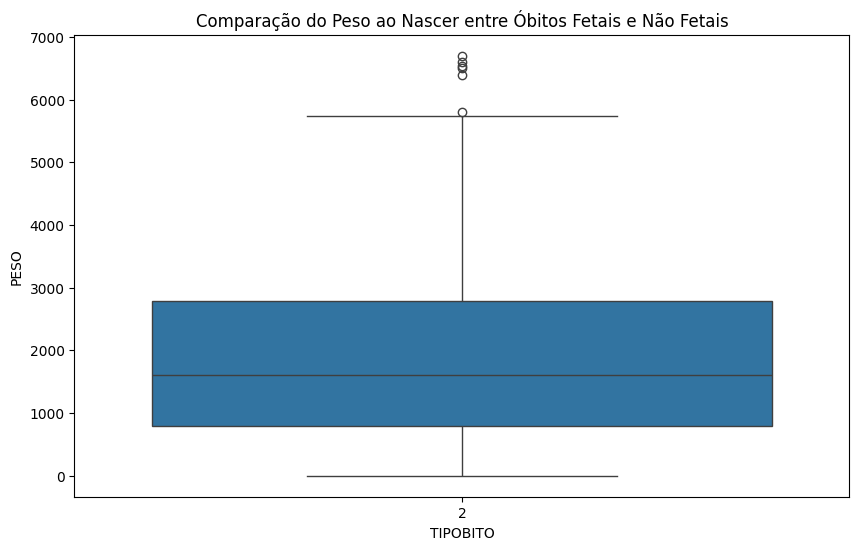

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['TIPOBITO'], y=dados['PESO'])
plt.title('Comparação do Peso ao Nascer entre Óbitos Fetais e Não Fetais')
plt.show()

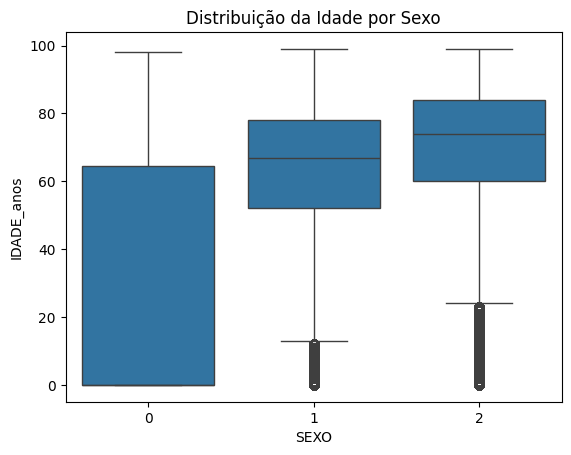

In [ ]:
sns.boxplot(x=dados['SEXO'], y=dados['IDADE_anos'])
plt.title('Distribuição da Idade por Sexo')
plt.show()

In [ ]:
dados_filtrado = dados[dados['SEXO'].isin([1, 2])].copy()
dados_filtrado['SEXO'] = dados_filtrado['SEXO'].map(map_sexo)

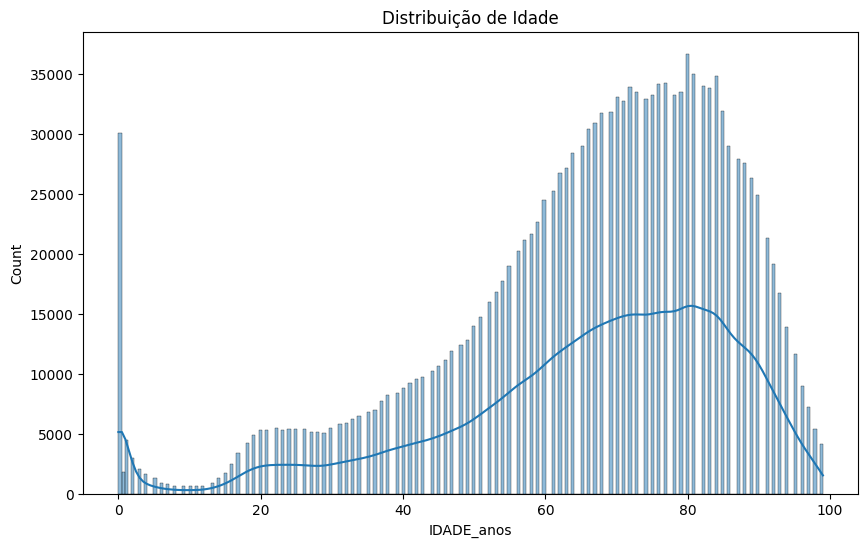

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dados['IDADE_anos'], kde=True)
plt.title('Distribuição de Idade')
plt.show()

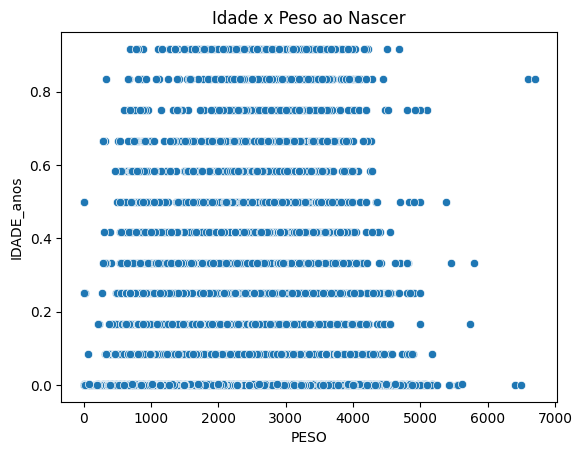

In [ ]:
sns.scatterplot(y=dados['IDADE_anos'], x=dados['PESO'])
plt.title('Idade x Peso ao Nascer')
plt.show()

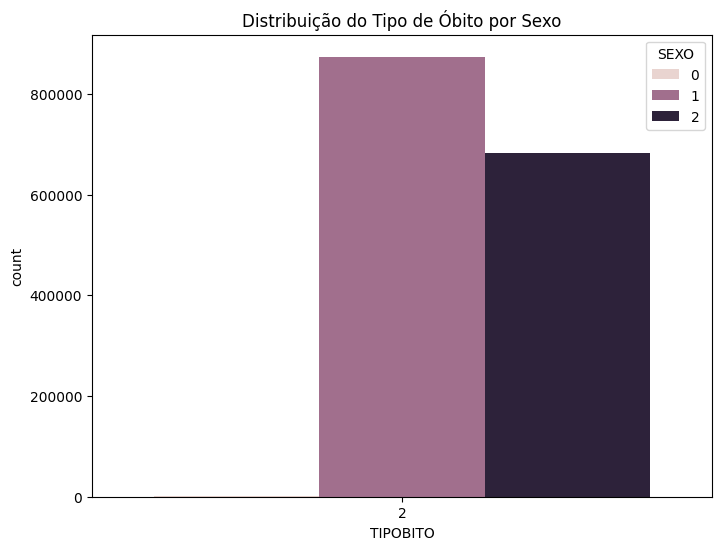

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x=dados['TIPOBITO'], hue=dados['SEXO'])
plt.title('Distribuição do Tipo de Óbito por Sexo')
plt.show()

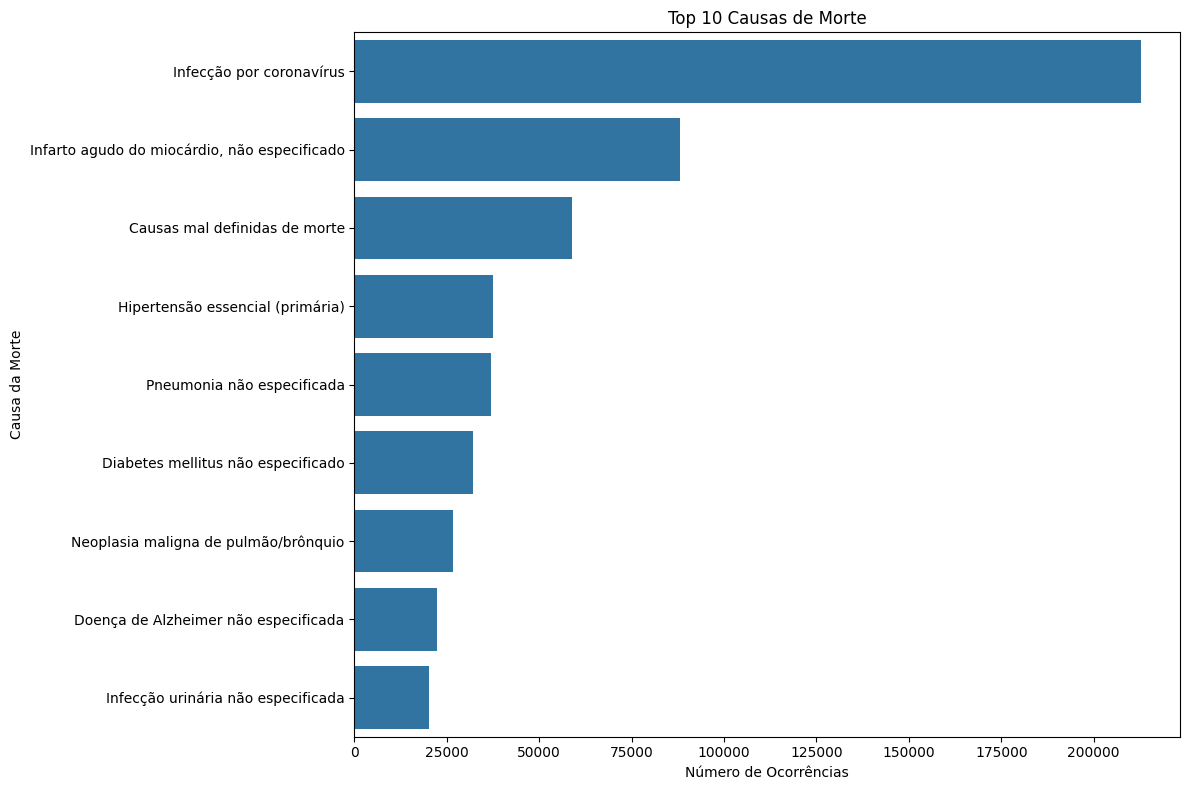

In [ ]:
# Selecionando as 10 causas mais frequentes
top_10_causas = dados['CAUSABAS'].value_counts().nlargest(10).index

dados['CAUSA_DESC'] = dados['CAUSABAS'].map(mapa_tipMorte)

top_10_desc = dados['CAUSA_DESC'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 8))
sns.countplot(y='CAUSA_DESC', data=dados, order=top_10_desc)
plt.title('Top 10 Causas de Morte')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Causa da Morte')
plt.tight_layout()
plt.show()

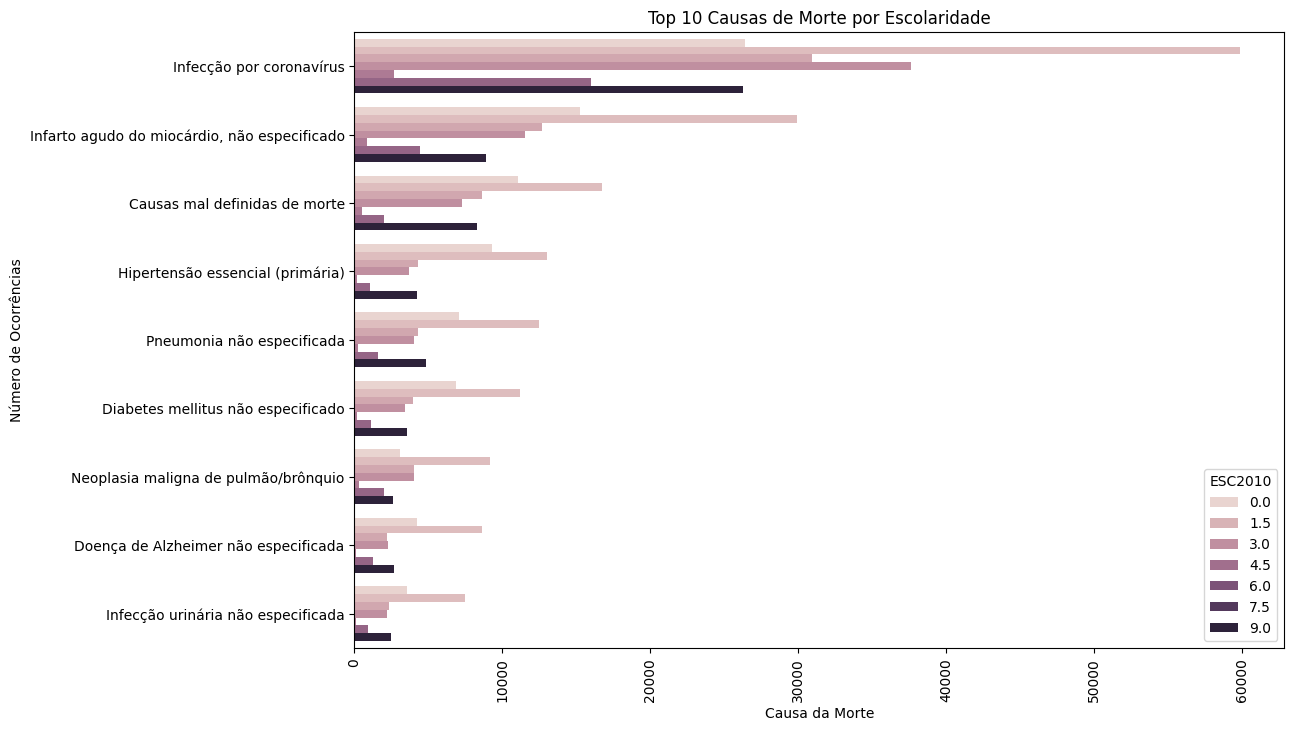

In [ ]:
# Selecionando as 10 causas de morte mais frequentes
top_10_causas = dados['CAUSA_DESC'].value_counts().nlargest(10).index

# Criando o gráfico de barras para as 10 causas de morte mais frequentes por escolaridade
plt.figure(figsize=(12, 8))
sns.countplot(y=dados['CAUSA_DESC'], hue=dados['ESC2010'], order=top_10_causas)
plt.xticks(rotation=90)
plt.title('Top 10 Causas de Morte por Escolaridade')
plt.xlabel('Causa da Morte')
plt.ylabel('Número de Ocorrências')
plt.show()


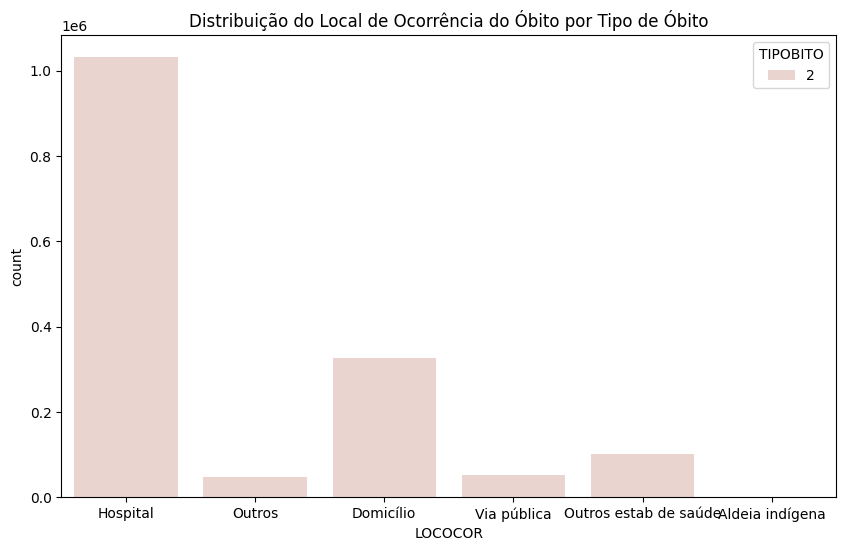

In [ ]:
# Analisando a relação entre local de ocorrência do óbito e tipo de óbito
plt.figure(figsize=(10, 6))
sns.countplot(x=dados['LOCOCOR'].map(mapa_local), hue=dados['TIPOBITO'])
plt.title('Distribuição do Local de Ocorrência do Óbito por Tipo de Óbito')
plt.show()

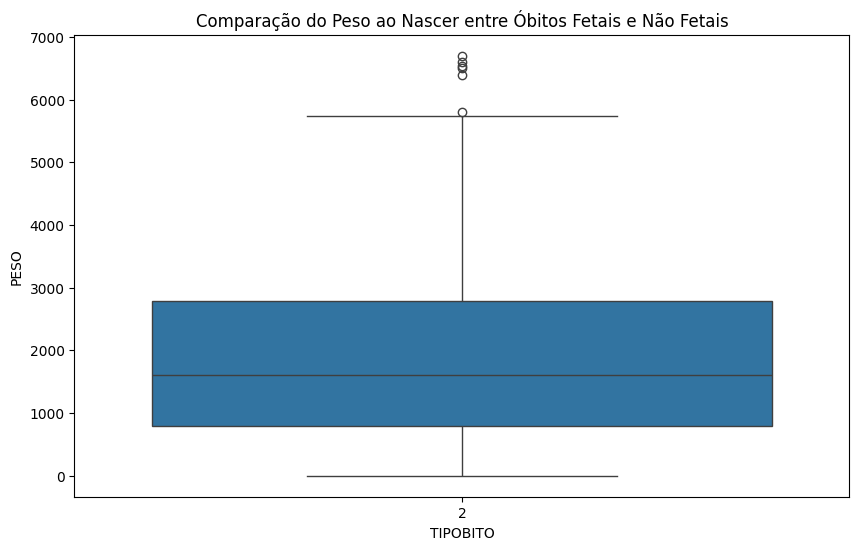

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['TIPOBITO'], y=dados['PESO'])
plt.title('Comparação do Peso ao Nascer entre Óbitos Fetais e Não Fetais')
plt.show()

In [ ]:
# Função para converter a idade da mãe para anos
def converter_idade_mae(idade_mae):
    idade_mae = str(idade_mae)

    if len(idade_mae) < 3 or not idade_mae.isdigit():
        return None

    unidade = int(idade_mae[0])
    valor = int(idade_mae[1:])

    if unidade == 1:  # Minutos
        return valor / (60 * 24 * 365)  # Minutos para anos
    elif unidade == 2:  # Horas
        return valor / (24 * 365)  # Horas para anos
    elif unidade == 3:  # Meses
        return valor / 12  # Meses para anos
    elif unidade == 4:  # Anos
        return valor  # Já está em anos
    elif unidade == 5:  # Idade maior que 100 anos
        return valor  # Já está em anos (presumindo que é um valor maior que 100)

    return None  # Caso a unidade seja ignorada (9)

dados['IDADEMAE_anos'] = dados['IDADEMAE'].apply(converter_idade_mae)


dados[['IDADEMAE', 'IDADEMAE_anos']].head()


,IDADEMAE,IDADEMAE_anos
0,NaN,None
1,NaN,None
2,NaN,None
3,NaN,None
4,NaN,None


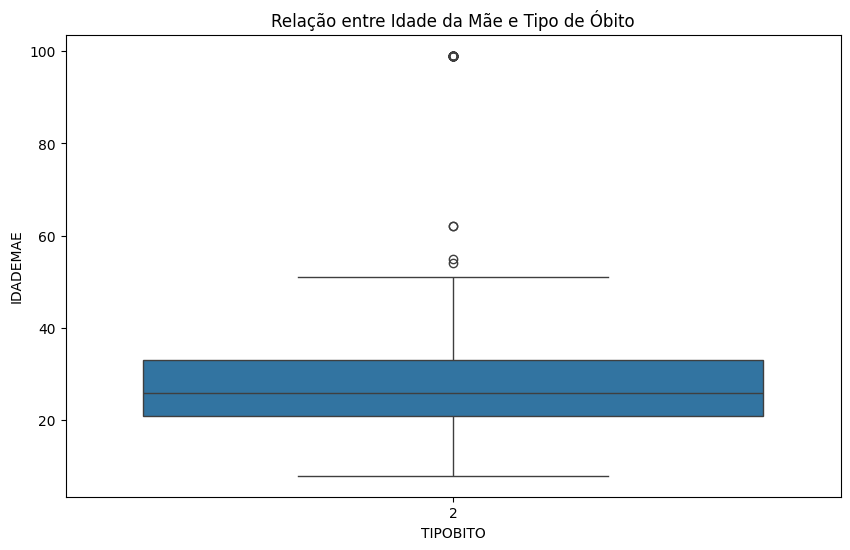

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dados['TIPOBITO'], y=dados['IDADEMAE'])
plt.title('Relação entre Idade da Mãe e Tipo de Óbito')
plt.show()

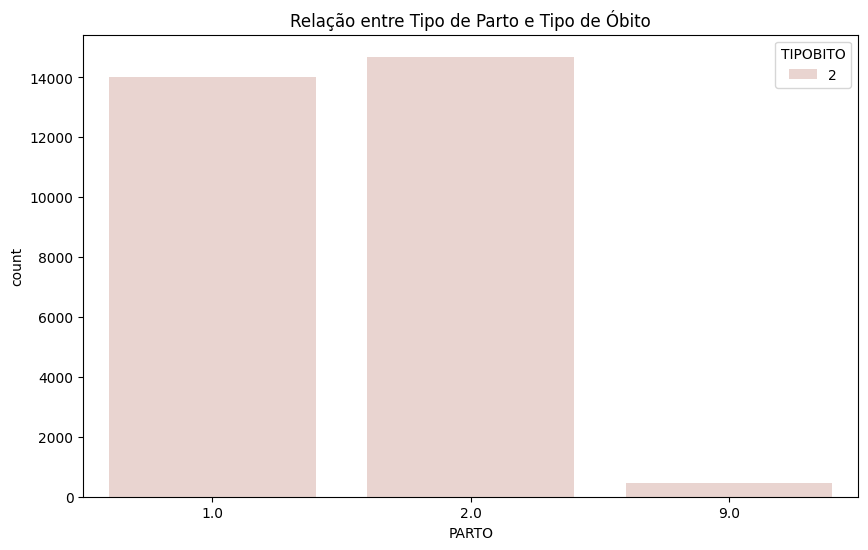

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=dados['PARTO'], hue=dados['TIPOBITO'])
plt.title('Relação entre Tipo de Parto e Tipo de Óbito')
plt.show()

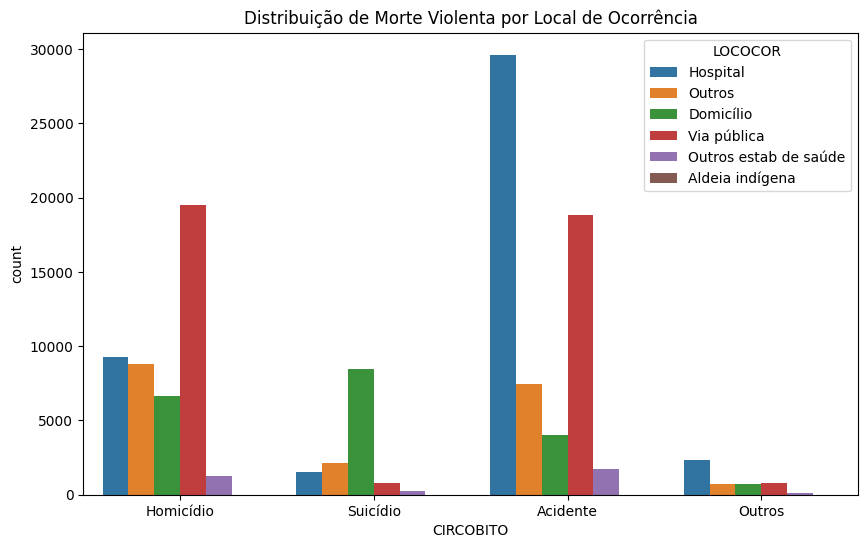

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=dados['CIRCOBITO'].map(mapa_MorteViolenta), hue=dados['LOCOCOR'].map(mapa_local))
plt.title('Distribuição de Morte Violenta por Local de Ocorrência')
plt.show()

In [ ]:
dados['COMUNSVOIM'].isna().sum()

np.int64(1335016)

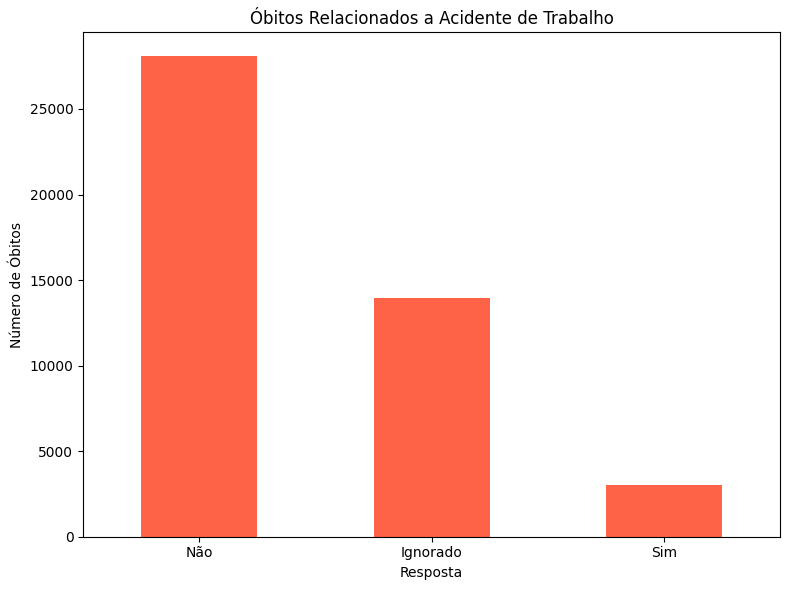

In [ ]:
# Mapa de rótulos
mapa_acidtrab = {
    1: 'Sim',
    2: 'Não',
    9: 'Ignorado'
}

# Converter tipo e aplicar o mapeamento
dados['ACIDTRAB'] = dados['ACIDTRAB'].astype(float).astype('Int64')
dados['ACIDTRAB_LABEL'] = dados['ACIDTRAB'].map(mapa_acidtrab)

contagem_acidtrab = dados['ACIDTRAB_LABEL'].value_counts()

contagem_acidtrab.plot(kind='bar', color='tomato', figsize=(8, 6))
plt.title('Óbitos Relacionados a Acidente de Trabalho')
plt.xlabel('Resposta')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()